In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset

In [6]:
data= pd.read_csv('data_cleaned115.csv')

In [7]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
data.shape

(891, 25)

In [9]:
data.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

### Seprating Dependent and independent Variables

In [10]:
x= data.drop(['Survived'], axis=1)

In [11]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:
y= data['Survived']

In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Splitting the Data into Train and Test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_x, test_x, train_y, test_y= train_test_split(x,y, random_state= 56)

### Normalization usin MIN MAX Function

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler= MinMaxScaler()

In [18]:
col= train_x.columns

In [19]:
col

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [20]:
train_x_scaled = scaler.fit_transform(train_x)

C:\Users\Hp pc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
train_x_scaled

array([[0.37170143, 0.02434958, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33400352, 0.01690807, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.34656949, 0.02469116, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30887158, 0.17777476, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.19577783, 0.07690368, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [23]:
train_x_scaled = pd.DataFrame(train_x_scaled, columns=col)

In [24]:
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=col)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Implementing Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression as LogReg

In [28]:
# Instance or object of logistic regression

In [29]:
logreg= LogReg()

In [30]:
# Fitting The Model

In [31]:
logreg.fit(train_x, train_y)

C:\Users\Hp pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction using Predict function

In [32]:
train_predict= logreg.predict(train_x)

In [33]:
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

### Calculating f1-score

In [36]:
from sklearn.metrics import f1_score

In [37]:
k= f1_score(train_predict, train_y)

In [38]:
k

0.7485148514851485

##### Predicting over the Test Set and f1-score


In [39]:
test_predict = logreg.predict(test_x)

In [40]:
test_predict

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [41]:
k = f1_score(test_predict, test_y)

In [42]:
k

0.7500000000000001

### Making Prediction using Proba_predict function

In [43]:
train_predict= logreg.predict_proba(train_x)

In [44]:
train_predict

array([[0.50532299, 0.49467701],
       [0.90358557, 0.09641443],
       [0.87905516, 0.12094484],
       ...,
       [0.23180909, 0.76819091],
       [0.3139615 , 0.6860385 ],
       [0.04488938, 0.95511062]])

In [45]:
train_preds = train_predict[:,1]
train_preds

array([0.49467701, 0.09641443, 0.12094484, 0.7826964 , 0.63158769,
       0.11959969, 0.8276528 , 0.76837161, 0.52316437, 0.08819518,
       0.10903798, 0.08834939, 0.12710635, 0.09929297, 0.60742357,
       0.08735943, 0.30854485, 0.12325234, 0.07441008, 0.28061949,
       0.10585236, 0.21134167, 0.07037308, 0.59759534, 0.09323402,
       0.52618717, 0.08819866, 0.55834191, 0.59353586, 0.13131489,
       0.81433108, 0.08838542, 0.58424828, 0.12972118, 0.01941743,
       0.59135583, 0.21086397, 0.13152669, 0.0612354 , 0.27460293,
       0.84284741, 0.39026631, 0.20569125, 0.71795573, 0.48472526,
       0.94248256, 0.3573382 , 0.23520256, 0.17378959, 0.89340088,
       0.13552784, 0.63959863, 0.2301236 , 0.60033807, 0.34034369,
       0.64464108, 0.77324435, 0.28159577, 0.11224541, 0.30456324,
       0.59461467, 0.28159577, 0.13033412, 0.45512495, 0.10073301,
       0.97659383, 0.12001893, 0.08834939, 0.85824021, 0.67783387,
       0.93271438, 0.75637983, 0.89304459, 0.44658065, 0.83485

## Setting Threshold 

In [46]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0

In [47]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7428571428571429


### Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cf= confusion_matrix(test_y, test_predict)

In [50]:
cf

array([[128,  16],
       [ 22,  57]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report as rep

In [52]:
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.78      0.72      0.75        79

   micro avg       0.83      0.83      0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



## Parameters of Logistic Regression

In [54]:
logreg.coef_                       #Printing the cofficient

array([[-0.03483324,  0.00290013,  0.9995272 ,  0.09486364, -1.05437925,
         1.17493838, -1.13492679,  0.876068  ,  1.08449093,  0.48118273,
        -0.58818058, -0.80578062, -0.43078884, -0.57698001,  0.23067554,
         0.6899365 , -0.08309987,  0.31876764, -0.59641794, -0.19446174,
        -0.32538854,  0.16857483,  0.15122559, -0.27978883]])

Text(0.5, 1.0, 'Coefficient plot')

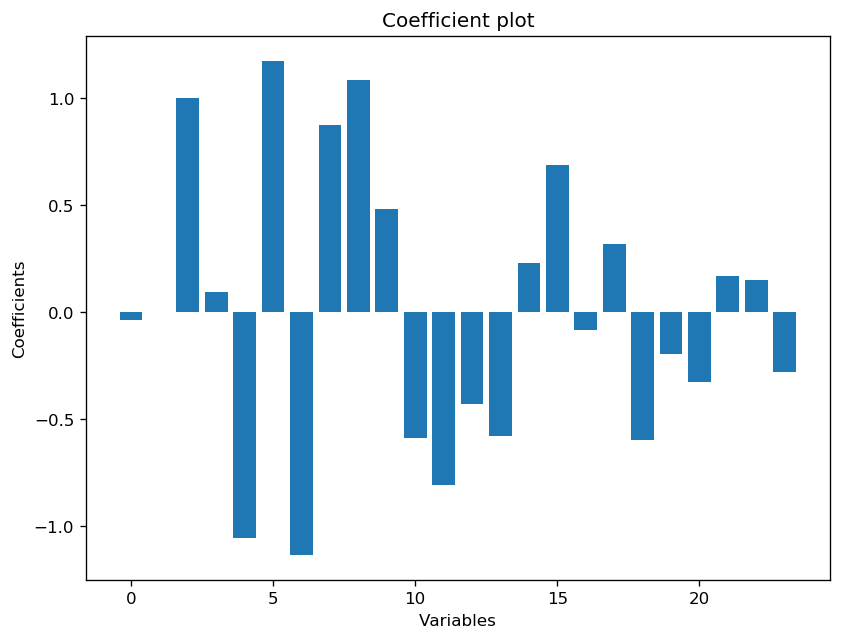

In [55]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [56]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.034833
1,Fare,0.002900
2,Pclass_1,0.999527
3,Pclass_2,0.094864
4,Pclass_3,1.054379


In [59]:
#selecting variables with high coefficient

In [60]:
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [61]:
sig_var

,Variable,coefficient
2,Pclass_1,0.999527
4,Pclass_3,1.054379
5,Sex_female,1.174938
6,Sex_male,1.134927
7,SibSp_0,0.876068
8,SibSp_1,1.084491
9,SibSp_2,0.481183
10,SibSp_3,0.588181
11,SibSp_4,0.805781
12,SibSp_5,0.430789


In [62]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_3,Parch_4,Parch_6
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [63]:
# Using train test split function

train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

### Implementing Logistic Regression

In [64]:
# Creating instance of Logistic Regresssion
logreg = LogReg()


In [65]:
# Fitting the model
logreg.fit(train_x, train_y)

C:\Users\Hp pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction using Predict function

In [67]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7025948103792415


Text(0.5, 1.0, 'Coefficient plot')

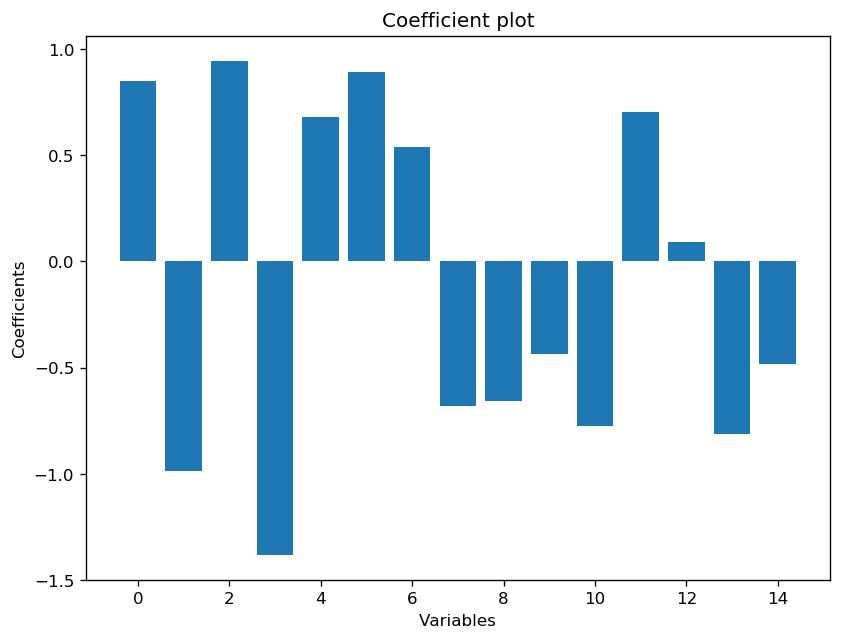

In [68]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')